In [3]:
import pandas as pd
import random

# Updated location map with observed variations
location_map_updated = {
    'AD': 'Asylum Down',
    'ASH': 'Ashaiman',
    'EL': 'East Legon',
    'JT': 'Jamestown',
    'LA': 'Labadi',
    'N1': 'N1 West Motorway', 'N1W': 'N1 West Motorway', 'N1WEST': 'N1 West Motorway',
    'NIMA': 'Nima', 'NM': 'Nima',
    'TMW': 'Tema Motorway',
    'TAIFA': 'Taifa', 'TF': 'Taifa',
    'UGH': 'University of Ghana'
}

# Parsing function with debug capability, now also returning the full file path
def parse_file_info_debug(file_name):
    try:
        full_path = file_name.strip()  # Capture the full file path
        filename = full_path.split('/')[-1].replace('.7z', '').replace('.zip', '')
        location_code = filename.split('_')[0].upper()
        location_full = location_map_updated.get(location_code, "Unknown Location")
        date_parts = filename.split('_')[1:4]
        date = f"{date_parts[0]}_{date_parts[1]}_{date_parts[2]}" if len(date_parts) == 3 else "Invalid Date"
        camera = filename.split('_')[4] if len(filename.split('_')) > 4 else "Invalid Camera"
        return full_path, location_full, date, camera  # Include full path in return
    except Exception as e:
        print(f"Error parsing file: {file_name.strip()} -> Error: {e}")
        return file_name.strip(), "Error Parsing", "Error Parsing", "Error Parsing"

# Apply parsing function to the entire dataset
file_path = 'camera_file_list.txt'  # Update with actual file path
with open(file_path, 'r') as file:
    lines = file.readlines()

full_dataset_data = [parse_file_info_debug(file) for file in lines]
df_full_dataset = pd.DataFrame(full_dataset_data, columns=['Full File Path', 'Site Location', 'Date', 'Camera'])

# Save the parsed dataset to a CSV file
output_file_path = 'full_dataset_parsed.csv'  # Update with desired output path
df_full_dataset.to_csv(output_file_path, index=False)


In [4]:
df_full_dataset.head()

,Full File Path,Site Location,Date,Camera
0,Camera/EL_05_08_2019_C12_S63.7z,East Legon,05_08_2019,C12
1,Camera/Nima_06_09_2019_C2_S21.7z,Nima,06_09_2019,C2
2,Camera/AD_29_11_2019_C4_S85.7z,Asylum Down,29_11_2019,C4
3,Camera/UGH_03_06_2019_C12_S10.7z,University of Ghana,03_06_2019,C12
4,Camera/AD_29_11_2019_C17_S21.7z,Asylum Down,29_11_2019,C17


In [38]:
import pandas as pd
import os
from tqdm.notebook import tqdm

def parse_txt_file_for_listings(txt_file_path):
    with open(txt_file_path, 'r') as file:
        lines = file.readlines()
    entries = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) > 4 and parts[3] == "....A":
            try:
                date_time_str = f"{parts[0]} {parts[1]}"
                date_time = pd.to_datetime(date_time_str)
                file_path = ' '.join(parts[4:])
                entries.append((date_time, file_path))
            except Exception as e:
                continue
    return entries

txt_files_dir = './zip_sample/'
txt_files = [f for f in os.listdir(txt_files_dir) if f.endswith('.txt')]

results = []
for txt_file in tqdm(txt_files, desc="Processing txt files"):
    txt_file_path = os.path.join(txt_files_dir, txt_file)
    entries = parse_txt_file_for_listings(txt_file_path)
    results.append((txt_file, len(entries)))

df_results = pd.DataFrame(results, columns=['File Name', 'Parsed Entries Count'])


Processing txt files:   0%|          | 0/20 [00:00<?, ?it/s]

In [41]:
import pandas as pd
import os
import re
from tqdm.notebook import tqdm

def parse_txt_file_for_listings(txt_file_path):
    """
    Parses a 7za listing text file, extracting datetime and filename information.

    Args:
        txt_file_path (str): The path to the text file.

    Returns:
        list: A list of tuples, each containing (datetime, filename).
    """
    pattern = r'\d{4}-\d{2}-\d{2} \d{1,2}:\d{2}:\d{2} \.\.\..\s+(\S+)'  # More flexible pattern
    entries = []

    with open(txt_file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                try:
                    datetime_str = match.group(1)
                    filename = match.group(2)
                    entries.append((pd.to_datetime(datetime_str), filename))
                except ValueError:  
                    print(f"Error parsing datetime in file {txt_file_path}, line: {line}")

    return entries

# ... (Rest of your code remains the same) 


In [42]:
df_results.head(20)

,File Name,Parsed Entries Count
0,EL_11_07_2022_C18_S30.txt,0
1,Nima_07_01_2022_C2_S2.txt,0
2,LA_12_05_2023_C35_S11.txt,0
3,EL_11_05_2020_C32_S46.txt,0
4,Taifa_21_01_2022_C26_S76.txt,0
5,AD_09_12_2022_C4_S29.txt,0
6,Taifa_30_07_2023_C26_S300.txt,0
7,Nima_21_05_2021_C40_S28.txt,0
8,N1W_27_03_2023_C8_S28.txt,0
9,Nima_22_10_2021_C2_S34.txt,0


In [17]:
import pandas as pd
import os
from tqdm.notebook import tqdm

def parse_txt_file_for_listings(txt_file_path):
    with open(txt_file_path, 'r') as file:
        lines = file.readlines()
    entries = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) >= 6 and "-" in parts[0] and ":" in parts[1]:
            try:
                date_time_str = f"{parts[0]} {parts[1]}"
                pd.to_datetime(date_time_str)
                file_path = ' '.join(parts[4:])
                entries.append((date_time_str, file_path.split(' ', 1)[1]))
            except:
                continue
    return entries

txt_files_dir = 'zip_contents'

expanded_data = []

# Helper function to extract and parse the date from the zip filename
def extract_date_from_filename(filename):
    # Assuming the date is always in the format dd_mm_yyyy within the filename
    try:
        parts = filename.split('_')
        # Extract the last three parts as they represent the date
        date_str = '_'.join(parts[-3:])
        # Attempt to parse the date, and return None if it fails
        return pd.to_datetime(date_str, format='%d_%m_%Y', errors='coerce').date()
    except ValueError:
        # Return pd.NaT when the date cannot be parsed
        return pd.NaT

for index, row in tqdm(df_full_dataset.iterrows(), total=df_full_dataset.shape[0], desc="Processing zip files"):
    zip_file_name = row['Full File Path'].split('/')[-1]
    txt_file_name = zip_file_name.replace('.7z', '.txt').replace('.zip', '.txt')
    txt_file_path = os.path.join(txt_files_dir, txt_file_name)
    
    zipped_filename_date = extract_date_from_filename(zip_file_name)  # Extract date from the zip filename
    
    if os.path.exists(txt_file_path):
        listings = parse_txt_file_for_listings(txt_file_path)
        for date_time_str, file_path in listings:
            expanded_data.append({
                'Full File Path': row['Full File Path'],
                'Site Location': row['Site Location'],
                'DateTime': pd.to_datetime(date_time_str),
                'Camera': row['Camera'],
                'File': file_path,
                'Zipped Filename Date': zipped_filename_date  # Add the parsed date
            })

df_expanded_dataset = pd.DataFrame(expanded_data)

expanded_output_file_path = 'expanded_full_dataset_parsed.csv'
df_expanded_dataset.to_csv(expanded_output_file_path, index=False)


Processing zip files:   0%|          | 0/3425 [00:00<?, ?it/s]

In [18]:
# len(df_expanded_dataset)
df_expanded_dataset.head()

439837

In [10]:
df_images_expanded_dataset = df_expanded_dataset[df_expanded_dataset['File'].str.lower().str.endswith('.jpg')]

expanded_output_file_path = 'expanded_full_dataset_parsed_images.csv'
df_images_expanded_dataset.to_csv(expanded_output_file_path, index=False)


In [11]:
df_images_expanded_dataset.head()

,Full File Path,Site Location,DateTime,Camera,File
1,Camera/EL_05_08_2019_C12_S63.7z,East Legon,2019-08-05 10:10:42,C12,EL_05_08_2019_C12_S63/MFDC8398.JPG
4,Camera/Nima_06_09_2019_C2_S21.7z,Nima,2019-09-06 09:47:22,C2,Nima_06_09_2019_C2_S21/MFDC5262.JPG
7,Camera/AD_29_11_2019_C4_S85.7z,Asylum Down,2019-11-29 08:20:54,C4,AD_29_11_2019_C4_S85/MFDC0003.JPG
10,Camera/UGH_03_06_2019_C12_S10.7z,University of Ghana,2019-06-03 10:58:44,C12,UGH_03_06_2019_C12_S10/MFDC4282.JPG
13,Camera/AD_29_11_2019_C17_S21.7z,Asylum Down,2019-11-29 08:14:18,C17,AD_29_11_2019_C17_S21/MFDC2672.JPG


/tmp/ipykernel_194/3304563565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_images_expanded_dataset['Date'] = df_images_expanded_dataset['DateTime'].dt.date


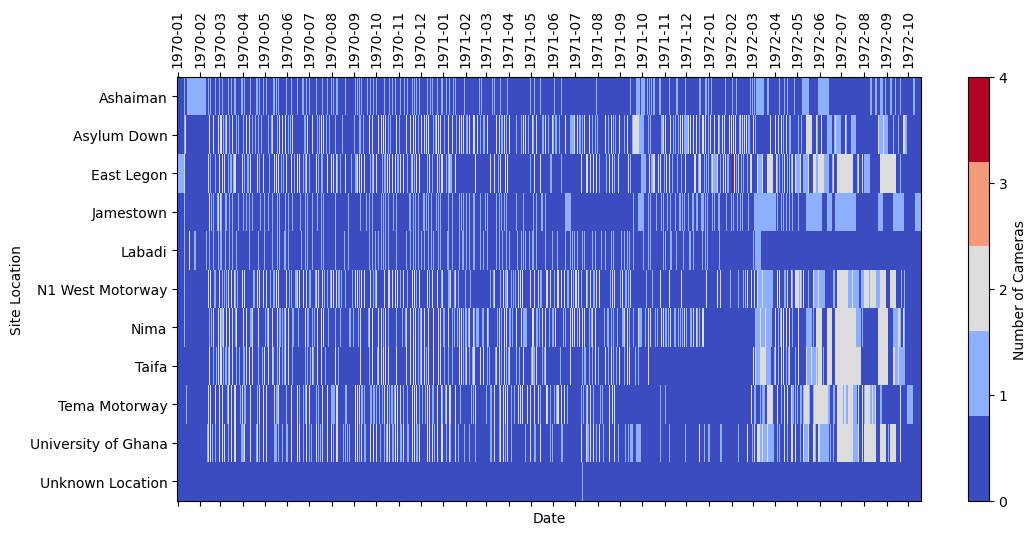

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Assuming df_images_expanded_dataset is your filtered DataFrame

# Extracting the date from the DateTime column for grouping
df_images_expanded_dataset['Date'] = df_images_expanded_dataset['DateTime'].dt.date

# Grouping by Site Location and Date, and counting unique cameras
grouped = df_images_expanded_dataset.groupby(['Site Location', 'Date'])['Camera'].nunique().reset_index()

# Creating a pivot table for visualization, filling missing days with 0
pivot = grouped.pivot_table(index='Site Location', columns='Date', values='Camera', fill_value=0)

# Preparing the plot
fig, ax = plt.subplots(figsize=(12, len(pivot.index) * 0.5))

# Creating a color map where 0 cameras = white, 1 camera = blue, 2 cameras = red, etc.
cmap = plt.get_cmap('coolwarm', np.max(pivot.values)+1)

# Plotting the timeline
cax = ax.matshow(pivot, cmap=cmap, aspect='auto')

# Setting ticks and labels
ax.set_yticks(np.arange(len(pivot.index)))
ax.set_yticklabels(pivot.index)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Site Location')

# Adding a color bar to indicate the number of cameras
cbar = fig.colorbar(cax, ticks=np.arange(np.max(pivot.values)+1))
cbar.ax.set_ylabel('Number of Cameras')

plt.show()


/tmp/ipykernel_194/1247535189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_images_expanded_dataset['Year'] = df_images_expanded_dataset['DateTime'].dt.year


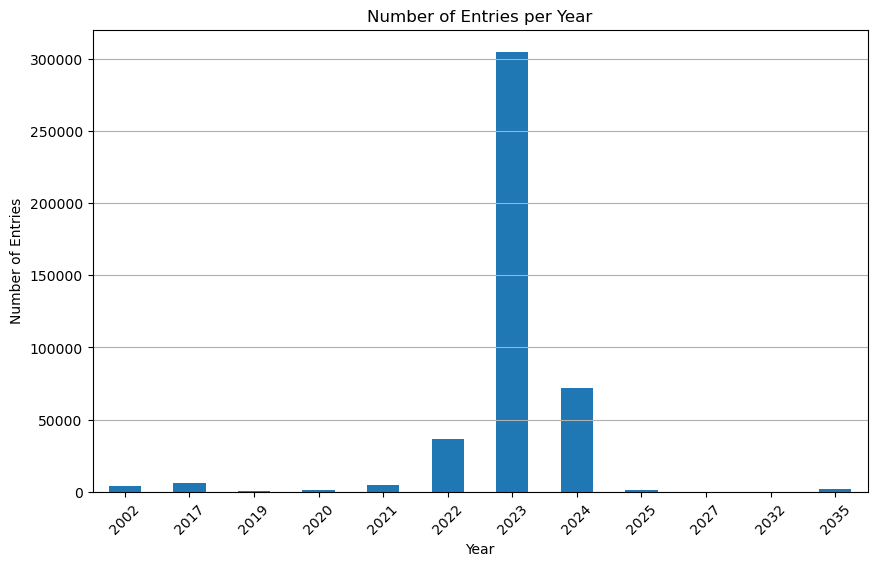

In [14]:
import matplotlib.pyplot as plt

# Extract the year from each datetime entry
df_images_expanded_dataset['Year'] = df_images_expanded_dataset['DateTime'].dt.year

# Count the number of entries per year
year_counts = df_images_expanded_dataset['Year'].value_counts().sort_index()

# Plotting the histogram
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()
